In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [41]:
dataframe = pd.read_csv("DS-DiabetesConDatosLimpiados.xlsx.csv", sep=';')

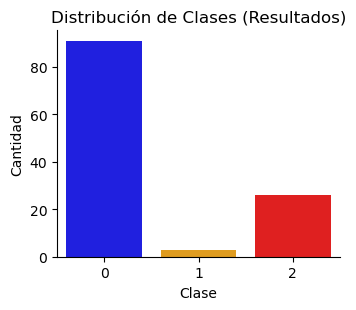

In [42]:
dataframe['Resultados'] = dataframe['Resultados'].astype(int)

sns.catplot(x='Resultados', hue='Resultados', data=dataframe, kind="count", height=3, aspect=1.2,
            palette={0:"blue", 1:"orange", 2:"red"}, legend=False)
plt.title("Distribución de Clases (Resultados)")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.show()

In [43]:
y = dataframe['Resultados']
x = dataframe.drop('Resultados', axis=1)

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=30)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

predicciones = knn.predict(x_test)

clasificadores = ["No Diabetes", "Pre Diabetes", "Diabetes"]

              No Diabetes  Pre Diabetes  Diabetes
No Diabetes            17             2         8
Pre Diabetes            0             0         0
Diabetes                3             1         5


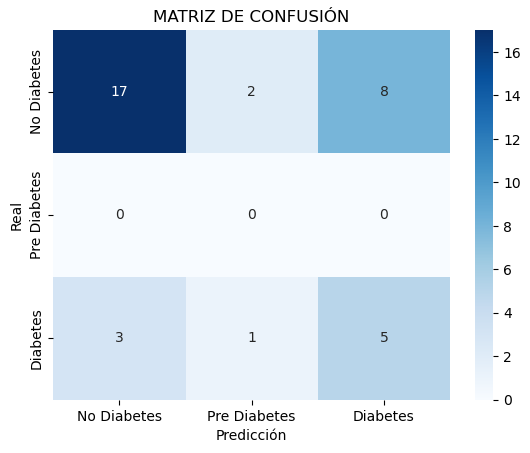

In [50]:
matriz = confusion_matrix(y_test, predicciones, labels=[0, 1, 2])
print(pd.DataFrame(matriz, index=clasificadores, columns=clasificadores))

sns.heatmap(matriz, annot=True, fmt="d", cmap="Blues", xticklabels=clasificadores, yticklabels=clasificadores)
plt.title('MATRIZ DE CONFUSIÓN')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [52]:
print(classification_report(y_test, predicciones, target_names=clasificadores))

              precision    recall  f1-score   support

 No Diabetes       0.85      0.63      0.72        27
Pre Diabetes       0.00      0.00      0.00         0
    Diabetes       0.38      0.56      0.45         9

    accuracy                           0.61        36
   macro avg       0.41      0.40      0.39        36
weighted avg       0.73      0.61      0.66        36



D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
